In [4]:
import pandas as pd

### 판다스

- 설치해야되는 시스템
- 자료구조 : 시리즈(column), 데이터 프레임


## 1. 데이터 읽기

In [5]:
#데이터 읽기
df = pd.read_csv("./data/gapminder.tsv", sep = "\t") #탭구분이라 \t
type(df)

pandas.core.frame.DataFrame

### 1.1 데이터 프레임 이해하기

In [19]:
df.shape #행열 반환 #건수와 항목수

(1704, 6)

In [34]:
df.columns #열 보기

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [40]:
df.head(1) #몇 행만 출력할건지 #subset이라 부름

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


In [39]:
df.columns[0] #컬럼 인덱싱 가능
df.columns[0:2] #컬럼 슬라이싱 가능

Index(['country', 'continent'], dtype='object')

In [55]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

#### EDA 기법(탐색적 데이터 분석) 나중에 찾아보기
shape, column, dtypes 등을 활용함

dtype : object는 str

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### 1.2 데이터 추출

In [86]:
df["country"]
df[df.columns[0]]
type(df[df.columns[0]]) #시리즈 객체

pandas.core.series.Series

In [95]:
df["country", "continent"] #이거 안됨

KeyError: ('country', 'continent')

In [105]:
df[["country","continent"]] #pandas는 리스트를 씌워줘야함
#속성 목록을 이용해서 데이터 프레임을 추출함
df[[df.columns[0], df.columns[1]]]

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [119]:
#원하는 컬럼 4개 추출해서 subset 생성하기
d1 = df[df.columns[1:5]]
d1.head(5), type(d1)

(  continent  year  lifeExp       pop
 0      Asia  1952   28.801   8425333
 1      Asia  1957   30.332   9240934
 2      Asia  1962   31.997  10267083
 3      Asia  1967   34.020  11537966
 4      Asia  1972   36.088  13079460,
 pandas.core.frame.DataFrame)

#### 행 추출하기
1. loc : [행 이름], default rangeindex -> number #라벨로 접근
2. iloc [행번호] #행번호로 접근

In [128]:
df.loc[0:10]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [164]:
#100번째 행 추출
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [134]:
df.loc[-1] #pandas에서는 음수를 지원하지 않음

KeyError: -1

In [139]:
#제일 마지막 행을 꺼내려면 이렇게 해야함
df.loc[df.shape[0]-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [140]:
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [144]:
#여러 행을 추출 - []로 만들어야함
df.loc[[0,1,4]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [148]:
df.iloc[[0,1,4]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [168]:
# loc[], iloc[]의 차이는 컬럼을 꺼내는 방식
df.loc[ [0], ["country"] ]

,country
0,Afghanistan


In [159]:
df.iloc[[0],[0]]

,country
0,Afghanistan


In [171]:
# slicing  : 콜론으로 하면됨
df.loc[:,"country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [177]:
df.loc[:,df.columns[:]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [197]:
df.loc[:10]
df.iloc[:5, 1:1]

""
0
1
2
3
4


### Range()

In [212]:
r_list = list(range(0,5))
df.iloc[:, r_list]

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460
...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418
1700,Zimbabwe,Africa,1992,60.377,10704340
1701,Zimbabwe,Africa,1997,46.809,11404948
1702,Zimbabwe,Africa,2002,39.989,11926563


In [219]:
even_list = list(range(0,5,2))
df.iloc[:,even_list]
df.iloc[even_list, :3]

,country,continent,year
0,Afghanistan,Asia,1952
2,Afghanistan,Asia,1962
4,Afghanistan,Asia,1972


In [225]:
df.iloc[::2, ::2] #콜론을 이용한 슬라이싱 구문

,country,year,pop
0,Afghanistan,1952,8425333
2,Afghanistan,1962,10267083
4,Afghanistan,1972,13079460
6,Afghanistan,1982,12881816
8,Afghanistan,1992,16317921
...,...,...,...
1694,Zimbabwe,1962,4277736
1696,Zimbabwe,1972,5861135
1698,Zimbabwe,1982,7636524
1700,Zimbabwe,1992,10704340


In [253]:
df.iloc[:10,[-1]] #-1을 감싸줘야 헤더까지 나옴

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


### 기초 통계 계산

In [261]:
#기초통계(descriptive)
#수치형(numeric)일때 가능한 기초통계를 보여줌
#전체 데이터의 요약
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [262]:
#그룹화
#연도별 기대수명 평균
#대륙별 국가 개수

In [289]:
#연도별 기대수명 평균
df.groupby("year")["lifeExp"].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [291]:
#대륙별 국가 개수
df.groupby("continent")["country"].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [293]:
#대륙별 인구 최대값
df.groupby("continent")["pop"].max()

continent
Africa       135031164
Americas     301139947
Asia        1318683096
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [323]:
df.groupby(df.columns[1])[df.columns[[-2]]].max().sort_index(ascending = False) #index를 기준으로 sort 근데 지금은 continent가 인덱스

,pop
continent,
Oceania,20434176
Europe,82400996
Asia,1318683096
Americas,301139947
Africa,135031164


In [19]:
df.groupby(df.columns[1])["pop"].max().sort_values(ascending=False) #index를 기준으로 sort 근데 지금은 continent가 인덱스

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [25]:
#df.groupby(df.columns[1])[df.columns[[-2]]].max().sort_values(ascending=False) #index를 기준으로 sort 근데 지금은 continent가 인덱스
df.groupby(df.columns[1])[df.columns[[-2]]].max().sort_index() #index를 기준으로 sort 근데 지금은 continent가 인덱스

,pop
continent,
Africa,135031164
Americas,301139947
Asia,1318683096
Europe,82400996
Oceania,20434176


In [23]:
# 빈도수 계산 nunique()
# 대륙별 국가의 개수 (중복 제외)
df.groupby("continent")["country"].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [28]:
#value_counts()
#모든 값을 행 개수 (중복 포함)
df.groupby("continent")["country"].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64

### 그래프로 그리기

In [31]:
year_lifeExp_mean = df.groupby("year")["lifeExp"].mean()
year_lifeExp_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

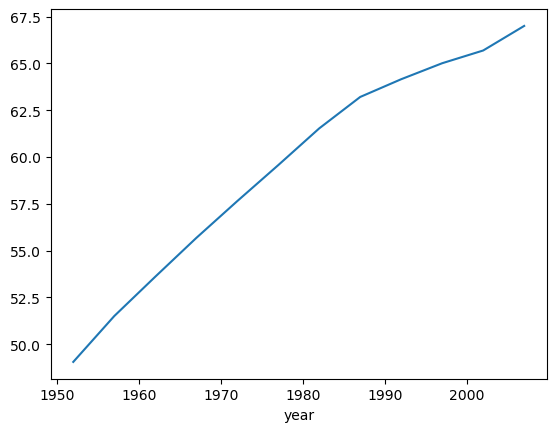

In [38]:
year_lifeExp_mean.plot() #연도별 기대수명을 그래줌

# 1023 오전 수업 채워넣어야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
22_pandas.ipynb

### 데이터 다루기
#### 시리즈 만들기

- 1차원 자료 : 리스트 유사, 넘파이의 array를 기본으로 만들어짐.
- 한 열의 데이터는 모두 동일한 타입

In [132]:
s = pd.Series(["banana",10])
type(s)

pandas.core.series.Series

In [134]:
s #RangeIndex

0    banana
1        10
dtype: object

In [135]:
s1 = pd.Series(data = ["홍길동","김길동"], index = ["a","b"])
s1

a    홍길동
b    김길동
dtype: object

In [139]:
s1.head()

a    홍길동
b    김길동
dtype: object

In [140]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [142]:
s1.loc["a"]

'홍길동'

In [144]:
s1.iloc[0]

'홍길동'

### 데이터 프레임 만들기

In [148]:
scientist = pd.DataFrame({
    "Name" : ["Rosaline Franklin","William Gosset"],
    "Occupation" : ["Chemist","Statistician"],
    "Born" : ["1920-07-25","1876-06-13"],
    "Died" : ["1958-04-16","1937-10-16"],
    "Age" : [37,61], #trailing comma 오류 방지 및 가독성을 증진시키기 위한 목적이라고 함
})

In [151]:
scientist.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [152]:
scientist

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [157]:
#name column을 인덱스로 지정하여, 데이터 프레임 생성하기
scientist1 = pd.DataFrame(
    data = {
            "Occupation" : ["Chemist","Statistician"],
            "Born" : ["1920-07-25","1876-06-13"],
            "Died" : ["1958-04-16","1937-10-16"],
            "Age" : [37,61],
    }
    ,
    index = ["Rosaline Franklin","William Gosset"]
)

In [158]:
scientist1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [168]:
f_row = scientist1.loc["Rosaline Franklin"]
f_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

In [169]:
f_row.index

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [171]:
f_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [172]:
scientist1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [173]:
scientist1.loc[:,"Age"]

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [174]:
age = scientist1["Age"]
age.mean()

49.0

In [4]:
scientist2 = pd.read_csv("./data/scientists.csv")
scientist2

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [177]:
scientist2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [178]:
scientist2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [180]:
ages = scientist2["Age"]
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [182]:
ages.describe() #기술통계량 확인, ages.mean()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [188]:
ages[ages > ages.mean()] #벡터화, 불리언값 리스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [192]:
ages + ages # > element wise - vector + vector - rank1 array

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [191]:
ages + 10 #vector + scalar >> broadcasting

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [193]:
s1 = pd.Series([1,100])
s1

0      1
1    100
dtype: int64

In [194]:
ages + s1 #넘파이의 브로드캐스팅과는 차이가 있음. 반드시 벡터의 길이가 같아야함

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

### 인덱스

In [195]:
#defauilt는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [197]:
rev_ages = ages.sort_index(ascending = False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [198]:
ages * 2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [199]:
ages + rev_ages #같은 인덱스를 기준으로 자동 정렬, 연산 수행

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [204]:
first_half = scientist2[:4]
second_half = scientist2[4:]
first_half

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [207]:
temp = pd.concat([first_half, second_half])

In [208]:
scientist2.info(), temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


(None, None)

In [209]:
#데이터 프레임에 스칼라 연산 - column의 type에 따라 연산
scientist2 * 2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [210]:
# 숫자로 구성한 데이터프레임의 더하기 연산 + , add()
df1 = df2 = pd.DataFrame(
            data = [[1,2,3],[4,5,6]]
    
)

df1

,0,1,2
0,1,2,3
1,4,5,6


In [211]:
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


# 열 추가 부터 계속 하면 됨

In [8]:
scientist2.head()

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist


In [11]:
scientist2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [20]:
#str >> datetime
born_datetime = pd.to_datetime(scientist2["Born"], format = "%Y-%m-%d")
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [59]:
scientist2["diet_dt"] = pd.to_datetime(scientist2["Died"],format = "%Y-%m-%d")
scientist2

,Name,Born,Died,Age,Occupation,diet_dt,born_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1958-04-16,1920-07-25,37.0,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1937-10-16,1876-06-13,61.0,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1910-08-13,1820-05-12,90.0,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1934-07-04,1867-11-07,66.0,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1964-04-14,1907-05-27,56.0,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1858-06-16,1813-03-15,45.0,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1954-06-07,1912-06-23,41.0,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1855-02-23,1777-04-30,77.0,77.0


In [23]:
scientist2["born_dt"] = pd.to_datetime(scientist2["Born"], format = "%Y-%m-%d")
scientist2["born_dt"]                                       

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: born_dt, dtype: datetime64[ns]

In [71]:
scientist2["age_days"] = scientist2["diet_dt"] - scientist2["born_dt"]
scientist2["age_days"].dtype

dtype('<m8[ns]')

In [69]:
#series.apply(함수)
import numpy as np

#numpy의 수학함수 #floor은 소수점을 버리고 가장 가까운 정수를 찾아줌
scientist2["age_days"] = (scientist2["age_days"].dt.days / 365).apply(np.floor)
scientist2["age_days"]

0    37.0
1    61.0
2    90.0
3    66.0
4    56.0
5    45.0
6    41.0
7    77.0
Name: age_days, dtype: float64

In [72]:
#df.assign(col _name = 수식), col_name은 새로 만들어짐

scientist2.assign(
    age_days_assign = scientist2["diet_dt"] - scientist2["born_dt"],
    age_assign = (scientist2["age_days"].dt.days / 365).apply(np.floor) #임시컬럼을 만든다    
)

,Name,Born,Died,Age,Occupation,diet_dt,born_dt,age_days,age_years,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1958-04-16,1920-07-25,13779 days,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1937-10-16,1876-06-13,22404 days,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1910-08-13,1820-05-12,32964 days,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1934-07-04,1867-11-07,24345 days,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1964-04-14,1907-05-27,20777 days,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1858-06-16,1813-03-15,16529 days,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1954-06-07,1912-06-23,15324 days,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1855-02-23,1777-04-30,28422 days,77.0,28422 days,77.0


### 열 삭제

In [73]:
scientist3_d = scientist2.drop(["Age"], axis = "columns")
scientist3_d

,Name,Born,Died,Occupation,diet_dt,born_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1958-04-16,1920-07-25,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1937-10-16,1876-06-13,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1910-08-13,1820-05-12,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1934-07-04,1867-11-07,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1964-04-14,1907-05-27,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1858-06-16,1813-03-15,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1954-06-07,1912-06-23,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1855-02-23,1777-04-30,28422 days,77.0


In [74]:
scientist2 #그대로임

,Name,Born,Died,Age,Occupation,diet_dt,born_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1958-04-16,1920-07-25,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1937-10-16,1876-06-13,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1910-08-13,1820-05-12,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1934-07-04,1867-11-07,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1964-04-14,1907-05-27,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1858-06-16,1813-03-15,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1954-06-07,1912-06-23,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1855-02-23,1777-04-30,28422 days,77.0


In [75]:
scientist2.drop(["Age"], axis = "columns", inplace = True) #이러면 옵션으로 원본 대체 가능
scientist2

,Name,Born,Died,Occupation,diet_dt,born_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1958-04-16,1920-07-25,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1937-10-16,1876-06-13,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1910-08-13,1820-05-12,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1934-07-04,1867-11-07,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1964-04-14,1907-05-27,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1858-06-16,1813-03-15,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1954-06-07,1912-06-23,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1855-02-23,1777-04-30,28422 days,77.0


### 파일 저장

- 피클로 저장(객체화, Serialize)  
- 파이썬의 데이터파일 형식 : binary 저장 / 읽기 .pickle / .pkl / .p
- 시리즈, 데이터 프레임 저장
- csv, txt, excel 지원
- to_csv(), read_csv()
- excel의 경우는 openpyxl을 설치해야한다.
- pip install openpyxl

to_pickle이 내부적으로 아래 Python의 내장 모듈을 수행하고 있음
fp = open()  
load(fp) #read  
dump(fp) #write  

In [76]:
scientist2["Name"]

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [77]:
scientist2["Name"].to_pickle("./data/scientist_name_series.pickle") #저장 경로 / 파일 이름

In [78]:
#피클 파일 읽어오기
series_pkl = pd.read_pickle("./data/scientist_name_series.pickle")
series_pkl

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [82]:
#csv 저장
scientist2.to_csv("./data/scientist_df.csv")


In [83]:
csv_open = pd.read_csv("./data/scientist_df.csv")
csv_open

,Unnamed: 0,Name,Born,Died,Occupation,diet_dt,born_dt,age_days,age_years
0,0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1958-04-16,1920-07-25,13779 days,37.0
1,1,William Gosset,1876-06-13,1937-10-16,Statistician,1937-10-16,1876-06-13,22404 days,61.0
2,2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1910-08-13,1820-05-12,32964 days,90.0
3,3,Marie Curie,1867-11-07,1934-07-04,Chemist,1934-07-04,1867-11-07,24345 days,66.0
4,4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1964-04-14,1907-05-27,20777 days,56.0
5,5,John Snow,1813-03-15,1858-06-16,Physician,1858-06-16,1813-03-15,16529 days,45.0
6,6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1954-06-07,1912-06-23,15324 days,41.0
7,7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1855-02-23,1777-04-30,28422 days,77.0


In [84]:
#pickle은 이러한 format 변환도 자유로움
sci_dict = scientist2.to_dict()
sci_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'diet_dt': {0: Timestamp('1958-04-16 00:00:00'),
  1: Timestamp('1937-10-16 00:00:00'),
  2: Timestamp('1910-08-13 00:00:00'),
  3: Timestamp('1934-07-04 00:00:00'),
  4: Timestamp('1964-04-14 00:00:00'),
  5: Timestamp('1858-06-16 00:00:00'),
  6: Timestamp('1954-06-07 00:00:00'),
  7: Timestamp('1855-02-23 00:00:00')},

In [85]:
#사전 형식과 데이터 프레임의 변환
sci_dict_df = pd.DataFrame.from_dict(sci_dict)
sci_dict_df

,Name,Born,Died,Occupation,diet_dt,born_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1958-04-16,1920-07-25,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1937-10-16,1876-06-13,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1910-08-13,1820-05-12,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1934-07-04,1867-11-07,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1964-04-14,1907-05-27,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1858-06-16,1813-03-15,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1954-06-07,1912-06-23,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1855-02-23,1777-04-30,28422 days,77.0


In [87]:
#json
#DataFrame을 직접 json으로 변환함
sci_json = scientist2.to_json(orient = "records", indent = 2, date_format = "iso")
sci_json



'[\n  {\n    "Name":"Rosaline Franklin",\n    "Born":"1920-07-25",\n    "Died":"1958-04-16",\n    "Occupation":"Chemist",\n    "diet_dt":"1958-04-16T00:00:00.000",\n    "born_dt":"1920-07-25T00:00:00.000",\n    "age_days":"P13779DT0H0M0S",\n    "age_years":37.0\n  },\n  {\n    "Name":"William Gosset",\n    "Born":"1876-06-13",\n    "Died":"1937-10-16",\n    "Occupation":"Statistician",\n    "diet_dt":"1937-10-16T00:00:00.000",\n    "born_dt":"1876-06-13T00:00:00.000",\n    "age_days":"P22404DT0H0M0S",\n    "age_years":61.0\n  },\n  {\n    "Name":"Florence Nightingale",\n    "Born":"1820-05-12",\n    "Died":"1910-08-13",\n    "Occupation":"Nurse",\n    "diet_dt":"1910-08-13T00:00:00.000",\n    "born_dt":"1820-05-12T00:00:00.000",\n    "age_days":"P32964DT0H0M0S",\n    "age_years":90.0\n  },\n  {\n    "Name":"Marie Curie",\n    "Born":"1867-11-07",\n    "Died":"1934-07-04",\n    "Occupation":"Chemist",\n    "diet_dt":"1934-07-04T00:00:00.000",\n    "born_dt":"1867-11-07T00:00:00.000",\n 

In [88]:
import pprint
pprint.pprint(sci_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Occupation":"Chemist",\n'
 '    "diet_dt":"1958-04-16T00:00:00.000",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "age_days":"P13779DT0H0M0S",\n'
 '    "age_years":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Occupation":"Statistician",\n'
 '    "diet_dt":"1937-10-16T00:00:00.000",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "age_days":"P22404DT0H0M0S",\n'
 '    "age_years":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Occupation":"Nurse",\n'
 '    "diet_dt":"1910-08-13T00:00:00.000",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "age_days":"P32964DT0H0M0S",\n'
 '    "age_years":90.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Marie Curie",\n'
 '    "Born":"1867-11-07",\n'
 '   

In [89]:
#json은 문자열이라 pickle로 바로 안됨
sci_json.to_pickle("./data/sci_json.pickle")

AttributeError: 'str' object has no attribute 'to_pickle'

In [90]:
# 그래서 josn >> DataFrame
# DataFrame을 이용해 다양한 파일의 형식으로 변환
df_json = pd.read_json(sci_json)
df_json

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7600\2927808864.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_json = pd.read_json(sci_json)


,Name,Born,Died,Occupation,diet_dt,born_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1958-04-16T00:00:00.000,1920-07-25T00:00:00.000,P13779DT0H0M0S,37
1,William Gosset,1876-06-13,1937-10-16,Statistician,1937-10-16T00:00:00.000,1876-06-13T00:00:00.000,P22404DT0H0M0S,61
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1910-08-13T00:00:00.000,1820-05-12T00:00:00.000,P32964DT0H0M0S,90
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1934-07-04T00:00:00.000,1867-11-07T00:00:00.000,P24345DT0H0M0S,66
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1964-04-14T00:00:00.000,1907-05-27T00:00:00.000,P20777DT0H0M0S,56
5,John Snow,1813-03-15,1858-06-16,Physician,1858-06-16T00:00:00.000,1813-03-15T00:00:00.000,P16529DT0H0M0S,45
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1954-06-07T00:00:00.000,1912-06-23T00:00:00.000,P15324DT0H0M0S,41
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1855-02-23T00:00:00.000,1777-04-30T00:00:00.000,P28422DT0H0M0S,77


In [91]:
df_json.to_pickle("./data/sci_json.pickle")

In [92]:
pd.read_pickle("./data/sci_json.pickle")

,Name,Born,Died,Occupation,diet_dt,born_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1958-04-16T00:00:00.000,1920-07-25T00:00:00.000,P13779DT0H0M0S,37
1,William Gosset,1876-06-13,1937-10-16,Statistician,1937-10-16T00:00:00.000,1876-06-13T00:00:00.000,P22404DT0H0M0S,61
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1910-08-13T00:00:00.000,1820-05-12T00:00:00.000,P32964DT0H0M0S,90
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1934-07-04T00:00:00.000,1867-11-07T00:00:00.000,P24345DT0H0M0S,66
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1964-04-14T00:00:00.000,1907-05-27T00:00:00.000,P20777DT0H0M0S,56
5,John Snow,1813-03-15,1858-06-16,Physician,1858-06-16T00:00:00.000,1813-03-15T00:00:00.000,P16529DT0H0M0S,45
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1954-06-07T00:00:00.000,1912-06-23T00:00:00.000,P15324DT0H0M0S,41
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1855-02-23T00:00:00.000,1777-04-30T00:00:00.000,P28422DT0H0M0S,77


## 데이터 전처리
### 깔끔한 데이터

##### 1. 열이름 : 변수가 아니라, 변수의 값이 온 경우 1개가 아니라 여러개
##### 2. 열이름에 데이터가 포함된 경우 : long data로 변환 > 필요한 ㅋ러럼으로 분할해서 데이터 프레임에 추가


In [3]:
#한 변수가 여러 열에 걸처진 데이터
import pandas as pd
pew = pd.read_csv("./data/pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [21]:
#분산되어 있는 컬럼을 하나로 합칩니다. > wide data => long data로 만들기
# 하나의 컬럼으로 합치기 > un-pivot(피봇 되돌리기, melt()
pew_long = pew.melt(id_vars = "religion", var_name = "income", value_name = "count")
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [28]:
pew.melt(id_vars = ["religion","<$10k"], var_name = "income", value_name = "count")


,religion,<$10k,income,count
0,Agnostic,27,$10-20k,34
1,Atheist,12,$10-20k,27
2,Buddhist,27,$10-20k,21
3,Catholic,418,$10-20k,617
4,Don’t know/refused,15,$10-20k,14
...,...,...,...,...
157,Orthodox,13,Don't know/refused,73
158,Other Christian,9,Don't know/refused,18
159,Other Faiths,20,Don't know/refused,71
160,Other World Religions,5,Don't know/refused,8


In [36]:
#wide data > long data로 바꾸기
#한 열에 여러 변수가 있는 데이터
billboard1 = pd.read_csv("./data/billboard.csv")
billboard1

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
billboard1.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [43]:
billboard1.melt(id_vars = ["year","artist","track"],
                var_name = "??",
                value_name = ""
               )

,year,artist,track,??,
0,2000,2 Pac,Baby Don't Cry (Keep...,time,4:22
1,2000,2Ge+her,The Hardest Part Of ...,time,3:15
2,2000,3 Doors Down,Kryptonite,time,3:53
3,2000,3 Doors Down,Loser,time,4:24
4,2000,504 Boyz,Wobble Wobble,time,3:35
...,...,...,...,...,...
24721,2000,Yankee Grey,Another Nine Minutes,wk76,NaN
24722,2000,"Yearwood, Trisha",Real Live Woman,wk76,NaN
24723,2000,Ying Yang Twins,Whistle While You Tw...,wk76,NaN
24724,2000,Zombie Nation,Kernkraft 400,wk76,NaN


In [96]:
df3 = pd.read_csv("./data/country_timeseries.csv")
df3.columns
df3

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df3.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [109]:
df3_long = df3.melt(id_vars = ["Date", "Day"], var_name = "willremove")
print(df3_long)
split_df3_long = df3_long.willremove.str.split("_")
status_values = split_df3_long.str.get(0)
country_values = split_df3_long.str.get(1)

            Date  Day    willremove   value
0       1/5/2015  289  Cases_Guinea  2776.0
1       1/4/2015  288  Cases_Guinea  2775.0
2       1/3/2015  287  Cases_Guinea  2769.0
3       1/2/2015  286  Cases_Guinea     NaN
4     12/31/2014  284  Cases_Guinea  2730.0
...          ...  ...           ...     ...
1947   3/27/2014    5   Deaths_Mali     NaN
1948   3/26/2014    4   Deaths_Mali     NaN
1949   3/25/2014    3   Deaths_Mali     NaN
1950   3/24/2014    2   Deaths_Mali     NaN
1951   3/22/2014    0   Deaths_Mali     NaN

[1952 rows x 4 columns]


In [128]:
order_list = ["status", "country","Date","Day"]

#df에 열 추가하기
df3_long["status"] = status_values
df3_long["country"] = country_values

df3_remove = df3_long.drop("willremove", axis = 1) #기존 컬럼 삭제함
sorted_df3 = df3_remove[order_list]
sorted_df3

,status,country,Date,Day
0,Cases,Guinea,1/5/2015,289
1,Cases,Guinea,1/4/2015,288
2,Cases,Guinea,1/3/2015,287
3,Cases,Guinea,1/2/2015,286
4,Cases,Guinea,12/31/2014,284
...,...,...,...,...
1947,Deaths,Mali,3/27/2014,5
1948,Deaths,Mali,3/26/2014,4
1949,Deaths,Mali,3/25/2014,3
1950,Deaths,Mali,3/24/2014,2


### 교재 방식

In [87]:
book_df = df3.melt(id_vars = ["Date","Day"])

In [91]:
result_book = book_df.variable.str.split("_", expand = True)
result_book

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [94]:
book_df[["status","country"]] = result_book
book_df

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


### 행에도 중복 데이터가 있을 떄

In [9]:
df_weather = pd.read_csv("./data/weather.csv")
df_weather.columns

Index(['id', 'year', 'month', 'element', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16',
       'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26',
       'd27', 'd28', 'd29', 'd30', 'd31'],
      dtype='object')

In [26]:
df_weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [27]:
#unpivot
df2_weather = df_weather.melt(
    id_vars = [
        "id", "year","month","element"
    ],
    var_name = "days",
    value_name = "temp"
)
df2_weather

,id,year,month,element,days,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [38]:
#pivot element column
df3_weather = df2_weather.pivot_table(
    index = [
        "id", "year","month","days"
    ], #multi-index가 됨
    columns = "element",
    values= "temp"
)
df3_weather

element                  tmax  tmin
id      year month days            
MX17004 2010 1     d30   27.8  14.5
             2     d11   29.7  13.4
                   d2    27.3  14.4
                   d23   29.9  10.7
                   d3    24.1  14.4
             3     d10   34.5  16.8
                   d16   31.1  17.6
                   d5    32.1  14.2
             4     d27   36.3  16.7
             5     d27   33.2  18.2
             6     d17   28.0  17.5
                   d29   30.1  18.0
             7     d3    28.6  17.5
                   d14   29.9  16.5
             8     d23   26.4  15.0
                   d5    29.6  15.8
                   d29   28.0  15.3
                   d13   29.8  16.5
                   d25   29.7  15.6
                   d31   25.4  15.4
                   d8    29.0  17.3
             10    d5    27.0  14.0
                   d14   29.5  13.0
                   d15   28.7  10.5
                   d28   31.2  15.0
                   d7    28.1  12.9
             11    d2    31.3  16.3
                   d5    26.3   7.9
                   d27   27.7  14.2
                   d26   28.1  12.1
                   d4    27.2  12.0
             12    d1    29.9  13.8
                   d6    27.8  10.5

In [39]:
#결과 데이터 프레임의 헤더를 평탄화, tidy data라고 부름
tidy_weather = df3_weather.reset_index()
tidy_weather

element,id,year,month,days,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


### 메서드 체이닝
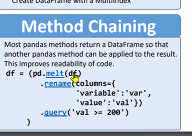

In [43]:
#메서드 체이닝
pd.melt(df_weather).rename(columns={"variable" : "test", "value" : "test2"})

,test,test2
0,id,MX17004
1,id,MX17004
2,id,MX17004
3,id,MX17004
4,id,MX17004
...,...,...
765,d31,NaN
766,d31,NaN
767,d31,NaN
768,d31,NaN


## 데이터프레임에 함수 적용하기

In [47]:
df = pd.DataFrame({"a": [10, 20, 30], 
                   "b": [20, 30, 40]})
print(df)

    a   b
0  10  20
1  20  30
2  30  40


In [48]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


In [51]:
df["a"] ** 2

0    100
1    400
2    900
Name: a, dtype: int64

In [54]:
### 사용자 정의 함수(UDF_user define function)를 시리즈, 데이터프레임에 적용
type(df["a"])

pandas.core.series.Series

In [55]:
# 시리즈로 열 선택
df["a"]

0    10
1    20
2    30
Name: a, dtype: int64

In [56]:
def my_sq(x):
    return x**2

In [58]:
df["a"].apply(my_sq) #UDF를 apply해주면 됨

0    100
1    400
2    900
Name: a, dtype: int64

In [69]:
# 행 선택 및 함수 적용
df.iloc[:].apply(my_sq)

,a,b
0,100,400
1,400,900
2,900,1600


In [72]:
#매개변수가 2개임
def my_exp(x,e):
    return x ** e

In [82]:
df["a"].apply(my_exp, e = 2) #추가 매개변수 [이름 = 값]을 적어주면 됨

0    100
1    400
2    900
Name: a, dtype: int64

In [98]:
df.iloc[:].apply(my_exp, e= 2)

,a,b
0,100,400
1,400,900
2,900,1600


In [101]:
#행 단위로 계산됨
df.apply(my_exp, e = 2)

,a,b
0,100,400
1,400,900
2,900,1600


In [108]:
df.apply(my_exp, e = 2, axis = 1)
#axis 기준축 default = 0 => 행 단위로 처리함

,a,b
0,100,400
1,400,900
2,900,1600


In [113]:
#벡터화 되지 않는 연산
def print_me(x):
    print(x)

In [112]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [115]:
df.apply(print_me, axis = 1)
#axis를 기준으로 다르게 나옴

a    10
b    20
Name: 0, dtype: int64
a    20
b    30
Name: 1, dtype: int64
a    30
b    40
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [ ]:
#204페이지 apply 추가학습하기

In [136]:
def my_avg(x,y,z):
    return (x+y+z) / 3


In [137]:
df.apply(my_avg, y = 10, z = 10)

,a,b
0,10.000000,13.333333
1,13.333333,16.666667
2,16.666667,20.000000


#### 실전 연습

In [196]:
# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25    5000
1      Bob   45    7000
2  Charlie   35    6500
3    David   32    5500
4      Eva   28    6000


In [158]:
#나이에 따라 직원을 분류하는 함수 정의(young, mid, old)
def age_classify(x):
    if x > 40:
        return "old"
    elif x > 30:
        return "mid"
    elif x > 20:
        return "young"

In [199]:
#데이터 프레임에 나이(age)에 따라 분류한 함수 적용 후, "Category" 컬럼을 추가
df["AgeCategory"] = df["Age"].apply(age_classify)
df = df[["Name", "Age", "AgeCategory","Salary"]]
df

,Name,Age,AgeCategory,Salary
0,Alice,25,young,5000
1,Bob,45,old,7000
2,Charlie,35,mid,6500
3,David,32,mid,5500
4,Eva,28,young,6000


###### salary에 보너스 10%를 증가한 컬럼 "Bonus"를 추가 (단, labmda 사용)

In [220]:
df["Bonus"] = df["Salary"].apply(lambda x : int(x + x * 0.1))
df

,Name,Age,AgeCategory,Salary,Bonus
0,Alice,25,young,5000,5500
1,Bob,45,old,7000,7700
2,Charlie,35,mid,6500,7150
3,David,32,mid,5500,6050
4,Eva,28,young,6000,6600


##### 선생님 답안

In [189]:
def age_category(age):
    if age < 30 :
        return "Young"
    elif age  < 40:
        return "Mid"
    else:
        return "Old"
        

In [195]:
df["Category"] = df["Age"].apply(age_category)
df

,Name,Age,Salary,Category
0,Alice,25,5000,Young
1,Bob,45,7000,Old
2,Charlie,35,6500,Mid
3,David,32,5500,Mid
4,Eva,28,6000,Young


### 데이터 결힙하기

In [243]:
df1 = pd.read_csv("./data/concat_1.csv")
df2 = pd.read_csv("./data/concat_2.csv")
df3 = pd.read_csv("./data/concat_3.csv")
#shape, columns, index가 같음

In [259]:
total_df = pd.concat([df1,df2,df3], ignore_index = True) # ignore_index = True
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [260]:
total_df.reset_index() # concat의 ignore_index = True와 같은 효과

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,4,a4,b4,c4,d4
5,5,a5,b5,c5,d5
6,6,a6,b6,c6,d6
7,7,a7,b7,c7,d7
8,8,a8,b8,c8,d8
9,9,a9,b9,c9,d9


In [265]:
add_s = pd.Series(["a100","b100","c100","d100"])
type(add_s)

pandas.core.series.Series

In [266]:
new_add_s = pd.concat([total_df, add_s])
new_add_s

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,a8,b8,c8,d8,NaN
9,a9,b9,c9,d9,NaN


In [267]:
# df으로 바꾸어서 넣는다
new_df = pd.DataFrame(data = [["a100", "b100","c100","d100"]],
            columns = ["A","B","C","D"]            
            )

new_df

,A,B,C,D
0,a100,b100,c100,d100


In [270]:
new_add_s1 = pd.concat([total_df, new_df], ignore_index = True)
new_add_s1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


#### 열 연결하기

In [273]:
pd.concat([df1,df2,df3], axis = "columns") #열로 붙음 1이라고 옵션 줘도 됨

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


#### 열 이름으로 A컬럼 추출하기

In [284]:
a = pd.concat([df1,df2,df3],axis = "columns", ignore_index = True)

#### 리스트를 이용해 새로운 열로 추가

In [285]:
a["new_col"] = ["n1","n2","n3","n4"] 
a

,0,1,2,3,4,5,6,7,8,9,10,11,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [286]:
a["new_col_series"] = pd.Series(["n1","n2","n3","n4"])
a


,0,1,2,3,4,5,6,7,8,9,10,11,new_col,new_col_series
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4,n4


In [288]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [289]:
row_col_concat = pd.concat([df1,df2,df3])
row_col_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [293]:
row_col_concat = pd.concat([df1,df2,df3], join = "inner") #inner는 공통인 것만 갖고옴 #default는 outer
row_col_concat

""
0
1
2
3
0
1
2
3
0
1


In [296]:
# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})

In [307]:
df1 = pd.concat([january, february], ignore_index = True)
df1

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250
2,2023-02-01,300
3,2023-02-02,350


In [305]:
# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})

In [313]:
pd.concat([store_a, store_b["Sales_B"]], axis = "columns")

,Date,Sales_A,Sales_B
0,2023-01-01,200,300
1,2023-01-02,250,350


In [324]:
pd.concat([store_a.set_index("Date"), store_b.set_index("Date")], axis = "columns")
pd.concat([store_a.set_index("Date"), store_b.set_index("Date")], axis = "columns").reset_index()

,Date,Sales_A,Sales_B
0,2023-01-01,200,300
1,2023-01-02,250,350


In [314]:
# 상점 C의 매출 데이터
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

# 상점 D의 매출 데이터
store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})

In [335]:
pd.concat([store_c.set_index("Date"),store_d.set_index("Date")], axis = "columns").sort_values("Date").reset_index()

,Date,Sales_C,Sales_D
0,2023-01-01,220.0,NaN
1,2023-01-02,NaN,330.0
2,2023-01-03,280.0,370.0


In [377]:
dfs = []
for i in range(1,77):
    i = str(i)
    if len(i) < 2:
        i = "0" + i
        dfs.append(pd.read_csv(f"./data/billboard-by_week/billboard-{i}.csv"))
        
    else:
        dfs.append(pd.read_csv(f"./data/billboard-by_week/billboard-{i}.csv"))

pd.concat(dfs)

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [383]:
from pathlib import Path

billboard_data_files=(
    Path(".")
    .glob("./data/billboard-by_week/billboard-*.csv")
)

list_billboard_df = []

for i in billboard_data_files:
    df = pd.read_csv(i)
    list_billboard_df.append(df)
    
pd.concat(list_billboard_df)

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [387]:
from pathlib import Path

billboard_data_files=(
    Path(".")
    .glob("./data/billboard-by_week/billboard-*.csv")
)

list_billboard_df = []

billboard_df = [pd.read_csv(i) for i in billboard_data_files]
pd.concat(billboard_df)

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


#### 병합하기(join)
서로 다른 데이터 테이블이 하나의 키로 연결되어있는 구조  

In [2]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [14]:
pd.merge(sales_data, customer_data, on = "CustomerID")
#how = inner가 default임, 공통의 키(key)가 존재하는 경우를 merge함

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [15]:
pd.merge(sales_data,customer_data, how ="outer", on="CustomerID")

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [16]:
pd.merge(sales_data,customer_data, how ="left", on="CustomerID")

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East
3,104,2023-01-07,400,NaN,NaN


In [17]:
pd.merge(sales_data,customer_data, how ="right", on="CustomerID")

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,105,NaN,NaN,Eva,West


In [103]:
#245페이지 데이터 테이블 정규화
df1 = pd.read_csv("./data/billboard.csv")
df2 = df1.melt(
    id_vars = ["year","artist","track","time","date.entered"],
    var_name = "week",
    value_name = "ratings"
)

df2["ID"] = df2.index + 1
sep1 = df2[df2.columns[:5].tolist()+["ID"]]
sep1

,year,artist,track,time,date.entered,ID
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,2
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,3
3,2000,3 Doors Down,Loser,4:24,2000-10-21,4
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,5
...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,24088
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,24089
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,24090
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,24091


In [89]:
sep2 = df2[df2.columns[5:]]
sep2

,week,ratings,ID
0,wk1,87.0,1
1,wk1,91.0,2
2,wk1,81.0,3
3,wk1,76.0,4
4,wk1,57.0,5
...,...,...,...
24087,wk76,NaN,24088
24088,wk76,NaN,24089
24089,wk76,NaN,24090
24090,wk76,NaN,24091


In [117]:
#null만 추출
sep2[sep2["ratings"].isnull()]

,week,ratings,ID
334,wk2,NaN,335
413,wk2,NaN,414
422,wk2,NaN,423
424,wk2,NaN,425
513,wk2,NaN,514
...,...,...,...
24087,wk76,NaN,24088
24088,wk76,NaN,24089
24089,wk76,NaN,24090
24090,wk76,NaN,24091


#### 그룹 연산하기

##### 데이터 집계(groupby)
category 데이터를 기준으로 계산함

In [142]:
df = pd.read_csv("./data/gapminder.tsv",sep="\t")
df.shape
df.describe()

df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [149]:
df.groupby(by = "country").groups #속성을 살핌

{'Afghanistan': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'Albania': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'Algeria': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'Angola': [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'Argentina': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'Australia': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], 'Austria': [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83], 'Bahrain': [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], 'Bangladesh': [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], 'Belgium': [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 'Benin': [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], 'Bolivia': [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143], 'Bosnia and Herzegovina': [144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155], 'Botswana': [156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167], 'Brazil': [168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 17

In [171]:
df.groupby(by = "country").lifeExp.mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [178]:
#대륙별 평균 기대수명
df.groupby("continent").lifeExp.mean().astype("str") + "년"

continent
Africa       48.86533012820513년
Americas     64.65873666666667년
Asia        60.064903232323225년
Europe       71.90368611111111년
Oceania      74.32620833333333년
Name: lifeExp, dtype: object

In [182]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [185]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [199]:
df.groupby(by = ["continent", "year"]).lifeExp.mean()

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

### groupby에서 사용할 수 있는 집계함수
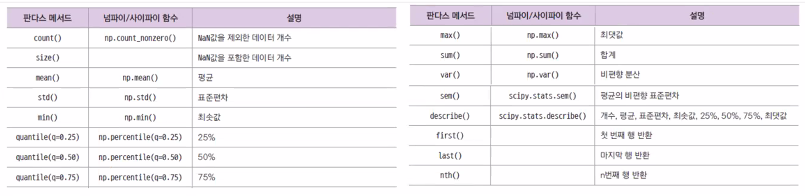

In [204]:
import numpy as np
df.groupby("continent").lifeExp.agg([np.mean, np.std, np.min, np.max]).reset_index()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6656\2769166343.py:2: FutureWarning: The provided callable <function mean at 0x0000024E8C57AA20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("continent").lifeExp.agg([np.mean, np.std, np.min, np.max]).reset_index()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6656\2769166343.py:2: FutureWarning: The provided callable <function std at 0x0000024E8C57AB60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby("continent").lifeExp.agg([np.mean, np.std, np.min, np.max]).reset_index()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6656\2769166343.py:2: FutureWarning: The provided callable <function min at 0x0000024E8C57A160> is currently using SeriesGr

,continent,mean,std,min,max
0,Africa,48.865330,9.150210,23.599,76.442
1,Americas,64.658737,9.345088,37.579,80.653
2,Asia,60.064903,11.864532,28.801,82.603
3,Europe,71.903686,5.433178,43.585,81.757
4,Oceania,74.326208,3.795611,69.120,81.235


In [206]:
df.groupby("continent").lifeExp.agg(["mean", "std", "min", "max"]).reset_index()

,continent,mean,std,min,max
0,Africa,48.865330,9.150210,23.599,76.442
1,Americas,64.658737,9.345088,37.579,80.653
2,Asia,60.064903,11.864532,28.801,82.603
3,Europe,71.903686,5.433178,43.585,81.757
4,Oceania,74.326208,3.795611,69.120,81.235


In [210]:
df.groupby("continent").agg(
    {
        "lifeExp":"mean", #여기에 UDF 정의가능
        "pop":"median",
        "gdpPercap":"max"
    }
    
).reset_index()
#agg에 UDF 정의가능

,continent,lifeExp,pop,gdpPercap
0,Africa,48.865330,4579311.0,21951.21176
1,Americas,64.658737,6227510.0,42951.65309
2,Asia,60.064903,14530830.5,113523.13290
3,Europe,71.903686,8551125.0,49357.19017
4,Oceania,74.326208,6403491.5,34435.36744


#### 데이터 변환 transform()

In [228]:
def my_zcore(x): #표준점수, 나의 값이 전체 데이터 평균과 비교해서 얼마나 떨어져있는지 보여줌
    return ((x - x.mean()) / x.std())

In [229]:
df.groupby("continent").lifeExp.transform(my_zcore)

0      -2.635073
1      -2.506033
2      -2.365698
3      -2.195190
4      -2.020889
          ...   
1699    1.473810
1700    1.258077
1701   -0.224730
1702   -0.970068
1703   -0.587782
Name: lifeExp, Length: 1704, dtype: float64

In [230]:
df.groupby("continent").count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


In [240]:
country_s = df["country"]
country_s.value_counts()

country
Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: count, Length: 142, dtype: int64

In [261]:
df.groupby("continent").filter(lambda x:x["continent"].count() > 600)

,country,continent,year,lifeExp,pop,gdpPercap
24,Algeria,Africa,1952,43.077,9279525,2449.008185
25,Algeria,Africa,1957,45.685,10270856,3013.976023
26,Algeria,Africa,1962,48.303,11000948,2550.816880
27,Algeria,Africa,1967,51.407,12760499,3246.991771
28,Algeria,Africa,1972,54.518,14760787,4182.663766
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [258]:
df.groupby("continent").count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
22,Albania,Europe,2002,75.651,3508512,4604.211737
23,Albania,Europe,2007,76.423,3600523,5937.029526
34,Algeria,Africa,2002,70.994,31287142,5288.040382
...,...,...,...,...,...,...
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1690,Zambia,Africa,2002,39.193,10595811,1071.613938
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [290]:
df1 = df[df["year"]>2000]
df2 = df1.groupby("continent").filter(lambda x:x["pop"].mean()>9279525)
df2

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
22,Albania,Europe,2002,75.651,3508512,4604.211737
23,Albania,Europe,2007,76.423,3600523,5937.029526
34,Algeria,Africa,2002,70.994,31287142,5288.040382
...,...,...,...,...,...,...
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1690,Zambia,Africa,2002,39.193,10595811,1071.613938
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


#### 결측치 처리
NaN, NAN, nan


In [281]:
from numpy import NAN, NaN, nan

In [284]:
import pandas as np
pd.isnull(NaN)


True

In [285]:
pd.notnull(NaN)

False